In [1]:
import pandas as pd

In [2]:
# load the dataset
df = pd.read_csv('spam.csv')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# check class balance
print(df['label'].value_counts())

label
0    4825
1     747
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# define the target feature (X) and target (y) variables
X = df['message']
y = df['label']

In [6]:
# split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [9]:
# fit on training data and transform both train and test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# create and train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [12]:
# predict on test data
y_pred = model.predict(X_test_vec)

In [13]:
# accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.97847533632287


In [14]:
# confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[966   0]
 [ 24 125]]


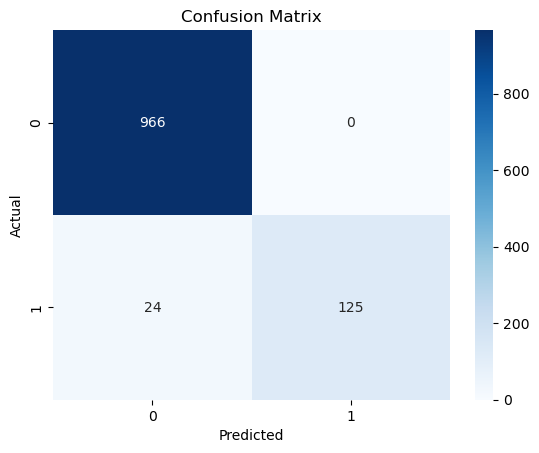

In [15]:
# confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# classification report
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

